## Get the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
# path of the folder with .parquet
folder_path = Path("c:/Users/AULA04/Desktop/Codes/zrive-ds/data/sampled-datasets")

In [4]:
# Browse the folder to save .parquet
for file_path in folder_path.glob("*.parquet"): 
    # create the name without the extension
    file_name = file_path.stem
    #sampled_datasets[file_name] = pd.read_parquet(file_path)
    print(f"DataFrame: {file_name}")


abandoned_carts = pd.read_parquet(f"{folder_path}/abandoned_carts.parquet")
inventory = pd.read_parquet(f"{folder_path}/inventory.parquet")
orders = pd.read_parquet(f"{folder_path}/orders.parquet")
regulars = pd.read_parquet(f"{folder_path}/regulars.parquet")
users = pd.read_parquet(f"{folder_path}/users.parquet")

DataFrame: abandoned_carts
DataFrame: inventory
DataFrame: orders
DataFrame: regulars
DataFrame: users


### Function initial check

In [24]:
def initial_checks_dataframe_column(column : pd.Series):
    try:
        is_null = column.isnull()
        duplicated = column.duplicated()
        column_types = column.apply(type).unique()
        print(f"//{column}//")
        print(column.info())
        print("/////")

        print(f"Total values: {column.count()}")
        print(f"Number of null values: {is_null.sum()} is the {is_null.mean() * 100 :.2f}% of data")
        print(f"Duplicates Values: {duplicated.sum()} is the {duplicated.mean() * 100 :.2f}% of data")
        print(f"Number of types: {len(column_types)} types: {column_types}")
        if len(column_types) == 1:

            if column_types == float or column_types == int:
                print(f"The mean: {column.mean()}")
                print(f"The standard deviation: {column.std()}")
                print(f"The min: {column.min()} The max: {column.max()} ")

        print(f"Number of values uniques: {len(column.unique())}")
        if len(column.unique()) < column.count()*0.50:
            print(f"The unique values : {column.unique() :.2f} ")
        print("\n")
    except:
        print("Error")   

## Checks initial to Tables

### User

users.parquet: Information about users.

user_id : Nothing - No changes   
user_segment: Two values, Top Up and Proposition, May be the categorization of pattern of shopping - No changes  
user_nuts1: Values of regions, there are 51 values empty - No changes  
*first_ordered_at: Change the type for pandas Timestamp  
*customer_cohort_month: Change the type for pandas Timestamp 

Only 325 lines have the next data, might be a survey.  
*count_people: there are 93% data empty, we can reemplace the values 0 and nan for 1 person. this way we are not invent data  
*count_adults: this is very similar to count_people, we can delete  
*count_children: The value Nan changes for 0  
*count_babies: The value Nan changes for 0  
*count_pets: The value Nan changes for 0  

In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


In [26]:
users

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3011,2c0eaa81411d8796e4e28a1a13265aa773e815d83e6db1...,Proposition,UKH,2022-01-18 10:10:39,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4343,bf8da3ba3538396b70564a49f55f26303af645a0fe32fa...,Top Up,UKI,2021-11-02 09:24:55,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2725,b1892f28d8bb191138ec1f098a8e229c16755f2616aea0...,Top Up,UKM,2021-06-10 12:46:07,2021-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4340,2745667201081b389e4b290565d17651b3eb94d9077183...,Proposition,UKI,2021-01-10 11:07:16,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN


#### Checks

In [27]:
for column in users:
    initial_checks_dataframe_column(users[column])

//2160    0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...
1123    15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...
1958    33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...
675     57ca7591dc79825df0cecc4836a58e6062454555c86c35...
4694    085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...
                              ...                        
3011    2c0eaa81411d8796e4e28a1a13265aa773e815d83e6db1...
4343    bf8da3ba3538396b70564a49f55f26303af645a0fe32fa...
2725    b1892f28d8bb191138ec1f098a8e229c16755f2616aea0...
4340    2745667201081b389e4b290565d17651b3eb94d9077183...
3360    d96aadc220f2776037e519f2c3bd4a2f0199658cc45b29...
Name: user_id, Length: 4983, dtype: object//
<class 'pandas.core.series.Series'>
Index: 4983 entries, 2160 to 3360
Series name: user_id
Non-Null Count  Dtype 
--------------  ----- 
4983 non-null   object
dtypes: object(1)
memory usage: 77.9+ KB
None
/////
Total values: 4983
Number of null values: 0 is the 0.00% of data
Duplicates Values: 0 is the 0.00% of d

### Abandoned_carts

Abandoned_cart.parquet: If a user has added items to their basket but not bought them, we capture that information. Items that were abandoned are stored as a list in item_ids.

id : Nothing

user_id : Nothing

created_at: Nothing

variant_id: Nothing

*Maybe Create a column with the numbers of products in the carts Len(variant_id)

In [28]:
abandoned_carts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


In [29]:
abandoned_carts

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"
...,...,...,...,...
70036,22233840976004,2e989bfdec87ef55ea464a529f323ff53dad2a2fc48655...,2022-03-13 14:11:15,"[34284950192260, 39466620911748]"
70041,22233843171460,b2d867b982b14ca517f27c4ced727c8a25c01b96ebbd96...,2022-03-13 14:11:36,"[39536607395972, 39506484461700]"
70043,22233843531908,220aafc0749f209b3f0f7cfe4134a5136815d48f0bbd9a...,2022-03-13 14:11:41,"[39482337624196, 39544243650692]"
70049,22233846218884,a4da55d51052411e54f98e1b90b19843121866abeaea76...,2022-03-13 14:12:09,"[34415989325956, 33667297017988, 3948233762419..."


In [30]:
for column in abandoned_carts:
    initial_checks_dataframe_column(abandoned_carts[column])

//0        12858560217220
13       20352449839236
45       20478401413252
50       20481783103620
52       20485321687172
              ...      
70036    22233840976004
70041    22233843171460
70043    22233843531908
70049    22233846218884
70050    22233846317188
Name: id, Length: 5457, dtype: int64//
<class 'pandas.core.series.Series'>
Index: 5457 entries, 0 to 70050
Series name: id
Non-Null Count  Dtype
--------------  -----
5457 non-null   int64
dtypes: int64(1)
memory usage: 85.3 KB
None
/////
Total values: 5457
Number of null values: 0 is the 0.00% of data
Duplicates Values: 0 is the 0.00% of data
Number of types: 1 types: [<class 'int'>]
The mean: 21618808560053.117
The standard deviation: 402867859962.06647
The min: 12858560217220 The max: 22233846317188 
Number of values uniques: 5457


//0        5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...
13       9d6187545c005d39e44d0456d87790db18611d7c7379bd...
45       e83fb0273d70c37a2968fee107113698fd4f389c442c0b...
50       10c4

### Inventory

inventory.parquet: Some information about each item_id

variant_id: Nothing  
price: There are 71 products without price, value zero  
compare_at_price: There are 72 products without price, value zero  
vendor: Nothing  
product_type: Nothing  
tags:  Nothing  

In [31]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [32]:
inventory

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]
...,...,...,...,...,...,...
1728,39539419218052,4.99,5.99,bother,,[household-sundries]
1729,34534187368580,4.69,5.49,tommeetippee,baby-accessories,[feeding-weaning]
1730,33826439594116,15.39,17.15,colief,baby-accessories,[feeding-weaning]
1731,33667214508164,19.49,21.65,enterosgel,medicines-treatments,"[discontinue, first-aid]"


In [33]:
for column in inventory:
    initial_checks_dataframe_column(inventory[column])

//0       39587297165444
1       34370361229444
2       34284951863428
3       33667283583108
4       33803537973380
             ...      
1728    39539419218052
1729    34534187368580
1730    33826439594116
1731    33667214508164
1732    33667214704772
Name: variant_id, Length: 1733, dtype: int64//
<class 'pandas.core.series.Series'>
RangeIndex: 1733 entries, 0 to 1732
Series name: variant_id
Non-Null Count  Dtype
--------------  -----
1733 non-null   int64
dtypes: int64(1)
memory usage: 13.7 KB
None
/////
Total values: 1733
Number of null values: 0 is the 0.00% of data
Duplicates Values: 0 is the 0.00% of data
Number of types: 1 types: [<class 'int'>]
The mean: 36948799362316.49
The standard deviation: 2725674300769.723
The min: 33615294398596 The max: 40167931707524 
Number of values uniques: 1733


//0        3.09
1        4.99
2        3.69
3        1.79
4        1.99
        ...  
1728     4.99
1729     4.69
1730    15.39
1731    19.49
1732    31.99
Name: price, Length: 1733, dt

In [34]:
inventory["compare_at_price"][inventory["compare_at_price"] == 0]

95      0.0
96      0.0
97      0.0
99      0.0
100     0.0
       ... 
1554    0.0
1575    0.0
1623    0.0
1627    0.0
1628    0.0
Name: compare_at_price, Length: 72, dtype: float64

### Orders

orders.parquet: An order history of customers. Each row is an order and the item_ids for the order are stored as a list in the item_ids column

id : nothing  
user_id : nothing  
created_at: there is one order duplicate  
order_date: nothing  
user_order_seq: Nothing  
ordered_items: Should create a other column with the number of items in the order  

In [35]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


In [36]:
orders

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."
...,...,...,...,...,...,...
64396,4026096910468,f524eaf26b76bc6226747768f120ffcd23d5c3d52a0a19...,2022-03-13 10:14:22,2022-03-13,5,"[33981947707524, 34284951273604, 3428495127360..."
64488,4026464993412,aa5e21db3186dcd84c161719c5ade8a19adb853ea8bfef...,2022-03-13 18:30:31,2022-03-13,3,"[33803540725892, 34284950519940, 3437091504141..."
64499,4026553434244,14be3833c19e0a1fd7e6db0e5375a3d1dcc9efafcb0e69...,2022-03-13 20:11:50,2022-03-13,11,"[39283356663940, 39283356663940, 4015514504410..."
64523,4026656030852,500027bf392bfa9ef527919569fba44904d429155b7cf4...,2022-03-13 22:29:24,2022-03-13,4,"[33824368033924, 33824368033924, 3382436803392..."


In [37]:
for column in orders:
    initial_checks_dataframe_column(orders[column])

//10       2204073066628
20       2204707520644
21       2204838822020
34       2208967852164
49       2215889436804
             ...      
64396    4026096910468
64488    4026464993412
64499    4026553434244
64523    4026656030852
64538    4026732413060
Name: id, Length: 8773, dtype: int64//
<class 'pandas.core.series.Series'>
Index: 8773 entries, 10 to 64538
Series name: id
Non-Null Count  Dtype
--------------  -----
8773 non-null   int64
dtypes: int64(1)
memory usage: 137.1 KB
None
/////
Total values: 8773
Number of null values: 0 is the 0.00% of data
Duplicates Values: 0 is the 0.00% of data
Number of types: 1 types: [<class 'int'>]
The mean: 3684683902139.2095
The standard deviation: 414543651600.97345
The min: 2204073066628 The max: 4026732413060 
Number of values uniques: 8773


//10       62e271062eb827e411bd73941178d29b022f5f2de9d37f...
20       bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...
21       329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...
34       f6451fce7b1c58d

In [38]:
orders[["user_order_seq","ordered_items"]]

,user_order_seq,ordered_items
10,1,"[33618849693828, 33618860179588, 3361887404045..."
20,1,"[33618835243140, 33618835964036, 3361886244058..."
21,1,"[33618891145348, 33618893570180, 3361889766618..."
34,1,"[33618830196868, 33618846580868, 3361891234624..."
49,1,"[33667166699652, 33667166699652, 3366717122163..."
...,...,...
64396,5,"[33981947707524, 34284951273604, 3428495127360..."
64488,3,"[33803540725892, 34284950519940, 3437091504141..."
64499,11,"[39283356663940, 39283356663940, 4015514504410..."
64523,4,"[33824368033924, 33824368033924, 3382436803392..."


### Regulars

regulars.parquet: Users are allowed to specify items that they wish to buy regularly. This data gives the items each user has asked to get regularly, along with when they input that information

user_id: Nothing  
variant_id: Should create a other column with number of variant  
created_at: Nothing

In [39]:
regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


In [40]:
regulars

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11
...,...,...,...
37644,20a41b8fa616484b39812aaa377ea1b53247f6941c0586...,39265878999172,2022-03-13 16:02:13
37717,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,39459281272964,2022-03-14 07:49:24
37718,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,33973246951556,2022-03-14 07:49:24
37719,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,39587297656964,2022-03-14 07:49:24


In [41]:
for column in regulars:
    initial_checks_dataframe_column(regulars[column])

//3        68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...
11       aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...
18       68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...
46       aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...
47       4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...
                               ...                        
37644    20a41b8fa616484b39812aaa377ea1b53247f6941c0586...
37717    ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...
37718    ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...
37719    ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...
37720    ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...
Name: user_id, Length: 18105, dtype: object//
<class 'pandas.core.series.Series'>
Index: 18105 entries, 3 to 37720
Series name: user_id
Non-Null Count  Dtype 
--------------  ----- 
18105 non-null  object
dtypes: object(1)
memory usage: 282.9+ KB
None
/////
Total values: 18105
Number of null values: 0 is the 0.00% of data
Duplicates Values: 16657 

## Relations

### Tipo de usuarios que mas abandonan compras

In [ ]:
#Usuarios que abandonan compras: Se puede analizar qué segmentos (user_segment) tienen más carritos abandonados.

#Primero, contar cuantos carritos abandonado por cliente hay
n_abandoned_cars = (
abandoned_carts.groupby("user_id")["id"]
.nunique()
.reset_index()
.rename(columns={"id":"n_abandoned_cars"}))

#ahora necesito relacionarlo con la tabla de usuarios para el tipo de usuario
n_abandoned_cars_by_users_segment = (
users.merge(n_abandoned_cars, on="user_id",how="inner")
    .groupby("user_segment")["n_abandoned_cars"]
    .sum()
    .reset_index()
    .rename(columns={"n_abandoned_cars":"n_abandoned_cars_by_users_segment"})
)


<Axes: ylabel='n_abandoned_cars_by_users_segment'>

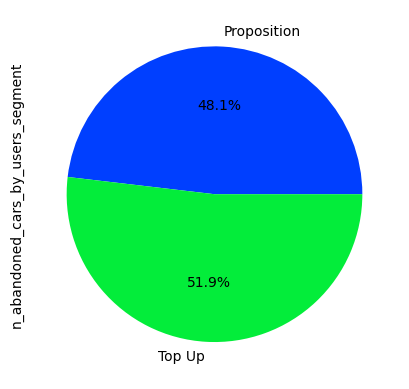

In [101]:
n_abandoned_cars_by_users_segment.set_index("user_segment")["n_abandoned_cars_by_users_segment"].plot(kind="pie", autopct="%1.1f%%")

### Numero de regulars

In [29]:
n_regulars = (
	regulars.groupby("user_id")["variant_id"]
    .nunique()
    .reset_index()
    .rename(columns={"variant_id":"n_regulars"})
)

users = users.merge(n_regulars, on="user_id",how="left").fillna({"n_regulars":0})


<Axes: xlabel='user_segment'>

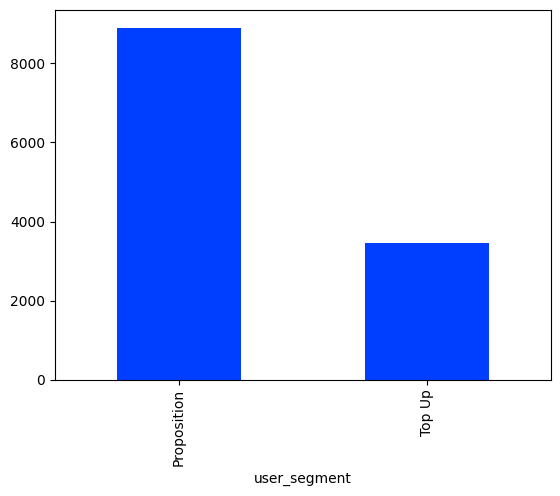

In [135]:
users.groupby("user_segment")["n_regulars"].sum().plot(kind="bar")

### Numero de productos abandonados vs comprados

In [ ]:
#Optimización de inventario: Relacionar con abandoned_carts para ver si ciertos productos se agregan pero no se compran.
n_abandoned = (
    abandoned_carts["variant_id"]
    .explode('variant_id')
    .value_counts()
    .rename("n_abandoned")
    )
#Productos mas comprados
n_purchased = (
    orders["ordered_items"]
    .explode("ordered_items")
    .value_counts()
    .rename("n_purchased")
)
n_purchased.index = n_purchased.index.rename("variant_id")

inventory = inventory.merge(n_abandoned, on="variant_id",how="inner")
inventory = inventory.merge(n_purchased, on="variant_id",how="inner")

,variant_id,price,compare_at_price,vendor,product_type,tags,n_abandoned,n_purchased
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]",60,552
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]",253,939
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll],478,1133
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]",46,129
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories],83,183
...,...,...,...,...,...,...,...,...
1378,39462725550212,7.99,8.00,venus,shaving-grooming,[razors-blades],1,1
1379,34460975890564,4.99,5.00,bulldog,shaving-grooming,"[discontinue, eco, shaving-gel-cream, vegan]",1,1
1380,33667304784004,26.99,29.99,creativenature,superfoods-supplements,"[discontinue, protein-nutrient-powders]",1,2
1381,34534187106436,5.39,5.99,tommeetippee,baby-accessories,[feeding-weaning],2,3


In [ ]:
#relation_buy_vs_abandoned: productos que casi siempre son comprados y nunca abandonados
inventory["relation_buy_vs_abandoned"] = (inventory["n_purchased"]/(inventory["n_purchased"]+inventory["n_abandoned"]))
relation_buy_vs_abandoned = inventory.sort_values(by="relation_buy_vs_abandoned",ascending=False)
relation_buy_vs_abandoned

,variant_id,price,compare_at_price,vendor,product_type,tags,n_abandoned,n_purchased,relation_buy_vs_abandoned
807,33826427633796,1.36,1.59,biona,tins-packaged-foods,"[pasta-pizza-sauce, tinned-tomatoes-puree-pass...",1,45,0.978261
385,39459277373572,5.19,5.25,ecoforce,cleaning-products,"[eco, sponges-cloths-gloves]",1,35,0.972222
446,39459281043588,4.89,4.98,bakers,dog-food,"[dry-dog-food, old-packaging, pm]",1,31,0.968750
852,33720734449796,5.79,5.92,faithinnature,bath-shower-gel,"[cruelty-free, shower-gel, vegan]",1,31,0.968750
456,33667240722564,7.49,7.50,lovebeautyplanet,haircare,"[eco, shampoo, vegan]",1,30,0.967742
...,...,...,...,...,...,...,...,...,...
550,39887965749380,23.99,24.00,funktionalfoods,superfoods-supplements,"[gluten-free, protein-nutrient-powders, vegan]",3,1,0.250000
746,39887964405892,9.99,10.00,persil,washing-capsules,[washing-capsules],3,1,0.250000
122,40029180067972,14.99,17.08,various,home-baking,"[baking-ingredients, flour, mixed-bundles]",3,1,0.250000
868,40091799945348,4.99,5.99,brushd,dental,"[carbon-neutral, cruelty-free, eco, organic, r...",4,1,0.200000


### Estadisticas Usuarios

count    4981.000000
mean        2.396105
std         7.516721
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        90.000000
Name: n_regulars, dtype: float64

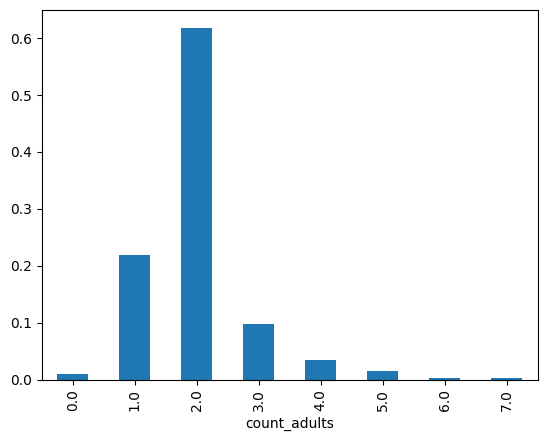

In [30]:
users.count_adults.value_counts(normalize=True).sort_index().plot(kind="bar")
users.loc[lambda x: x.n_regulars < 100].n_regulars.describe()

In [57]:
#porcentaje de la poblacion que tiene bebes, niños y mascotas
users["count_babies"].value_counts(normalize=True,dropna = True)


count_babies
0.0    0.929231
1.0    0.064615
2.0    0.006154
Name: proportion, dtype: float64

In [65]:
more_than_one_baby = users.loc[users["count_babies"] >= 1.0, "count_babies"].dropna()
percentage_more_than_one_baby = more_than_one_baby.count() / users["count_babies"].count()
percentage_more_than_one_baby


0.07076923076923076